In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical'] 

In [3]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [4]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
data = pd.read_csv('fake3-1.csv')

In [6]:
df = data.filter(['Timestamp','Water'], axis=1)

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
df.isna().sum()

df = df.dropna()
df.isnull().sum()

df = df.set_index('Timestamp')

In [9]:
df.count()

Water    5501
dtype: int64

In [10]:
# df1.drop(df1.index[200:5501],0,inplace=True)

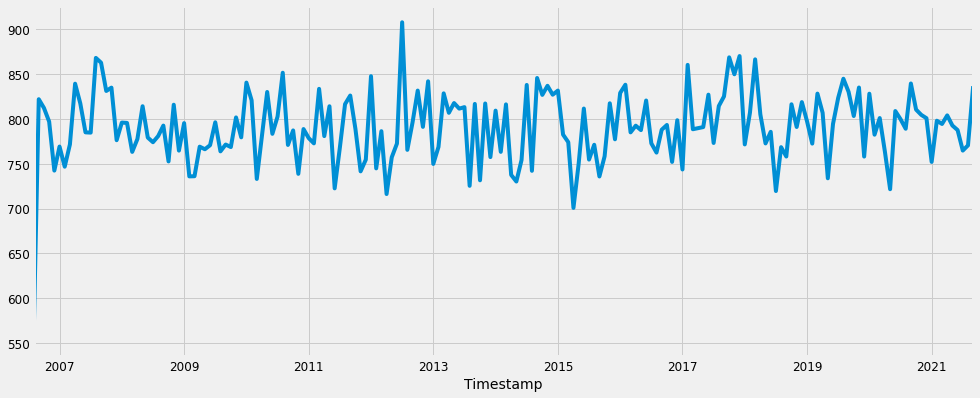

In [11]:
df1 = df['Water'].resample('MS').mean()
df1.plot(figsize = (15, 6))
plt.show()

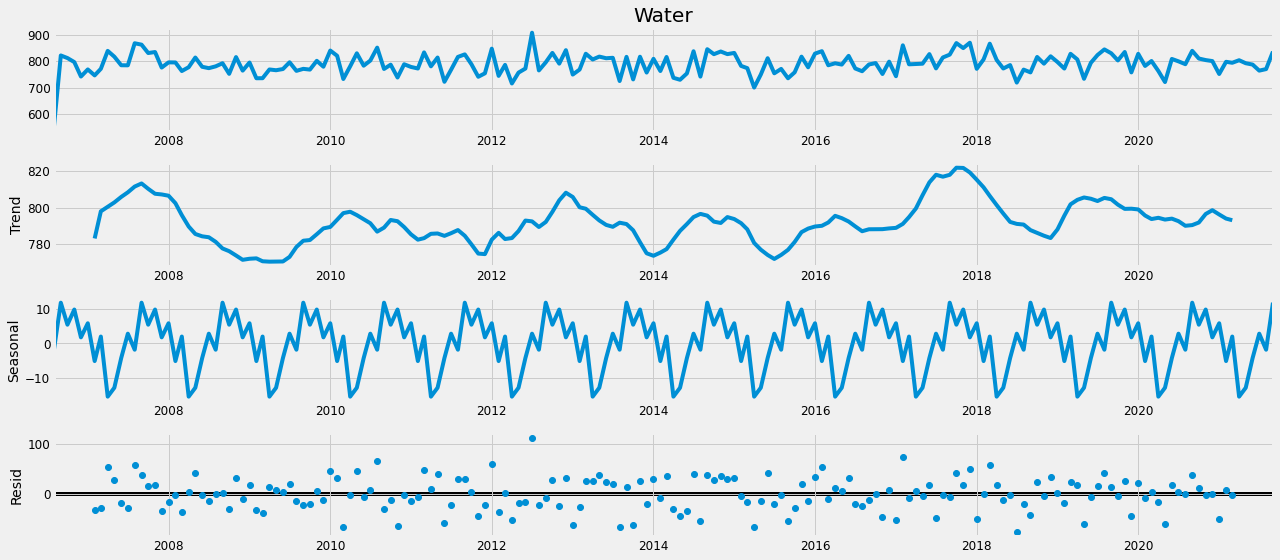

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    df1test = adfuller(timeseries, autolag='AIC')
    df1output = pd.Series(df1test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df1test[4].items():
       df1output['Critical Value (%s)'%key] = value
    print (df1output)

print(adf_test(df1))
print(kpss_test(df1))

Results of Dickey-Fuller Test:
Test Statistic                -8.437729e+00
p-value                        1.797666e-13
#Lags Used                     1.000000e+00
Number of Observations Used    1.800000e+02
Critical Value (1%)           -3.467211e+00
Critical Value (5%)           -2.877735e+00
Critical Value (10%)          -2.575403e+00
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.277254
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


C:\Users\Sharon Ahenda\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [14]:
test_result=adfuller(df1)

In [15]:
def adfuller_test(df1):
    result=adfuller(df1)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df1)

ADF Test Statistic : -8.437728514115904
p-value : 1.7976659118797226e-13
#Lags Used : 1
Number of Observations Used : 180
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


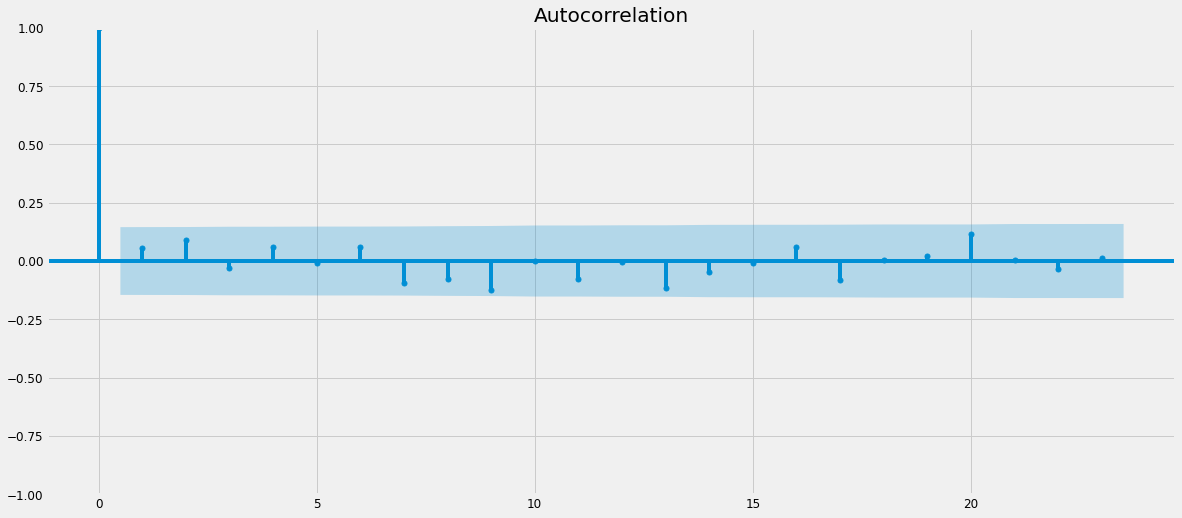

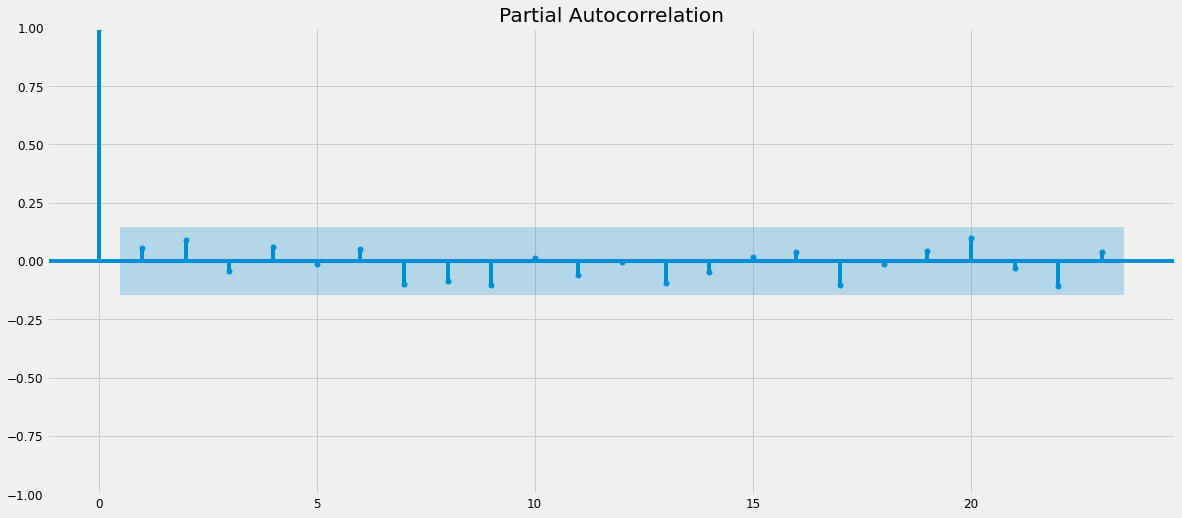

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1)
matplotlib.pyplot.show()
plot_pacf(df1)
matplotlib.pyplot.show()

In [18]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12)]

In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 5.206993
         Iterations: 2
         Function evaluations: 39
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1897.3452848784736
Optimization terminated successfully.
         Current function value: 5.073307
         Iterations: 3
         Function evaluations: 84
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1850.6838889997905
Optimization terminated successfully.
         Current function value: 5.065289
         Iterations: 2
         Function evaluations: 67
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1849.7650434696834
Optimization terminated successfully.
         Current function value: 5.123938
         Iterations: 2
         Function evaluations: 46
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1869.1133665705654
Optimization terminated successfully.
         Current function value: 5.062904
         Iterations: 4
         Function evaluations: 161
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1848.8972122163564
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 4.848453
         Iterations: 11
         Function evaluations: 786
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:1776.8370198357998
Optimization terminated successfully.
         Current function value: 4.849809
         Iterations: 5
         Function evaluations: 427
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:1779.3306452536162
Optimization terminated successfully.
         Current function value: 5.045102
         Iterations: 5
         Function evaluations: 244
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1844.4173067046431
Optimization terminated successfully.
         Current function value: 4.850565
         Iterations: 3
         Function evaluations: 189
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1775.6056125759228
Optimization terminated successfully.
         Current function value: 4.850524
         Iterations: 3
         Function evaluations: 220
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:1777.5907755213232
Optimization terminated succe

In [20]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(df1,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 1, 12))
mod = mod.fit(method = 'powell')
print(mod.summary().tables[1])

Optimization terminated successfully.
         Current function value: 4.839350
         Iterations: 10
         Function evaluations: 970
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7778      0.175     -4.447      0.000      -1.121      -0.435
ar.L2          0.1526      0.089      1.712      0.087      -0.022       0.327
ma.L1         -0.1170      0.250     -0.468      0.640      -0.607       0.373
ma.L2         -0.8830      0.184     -4.797      0.000      -1.244      -0.522
ar.S.L12       0.0098      0.140      0.070      0.944      -0.264       0.283
ar.S.L24       0.0558      0.140      0.398      0.691      -0.219       0.331
ma.S.L12      -0.9341      0.257     -3.628      0.000      -1.439      -0.429
sigma2      1654.4026      0.000   8.54e+06      0.000    1654.402    1654.403


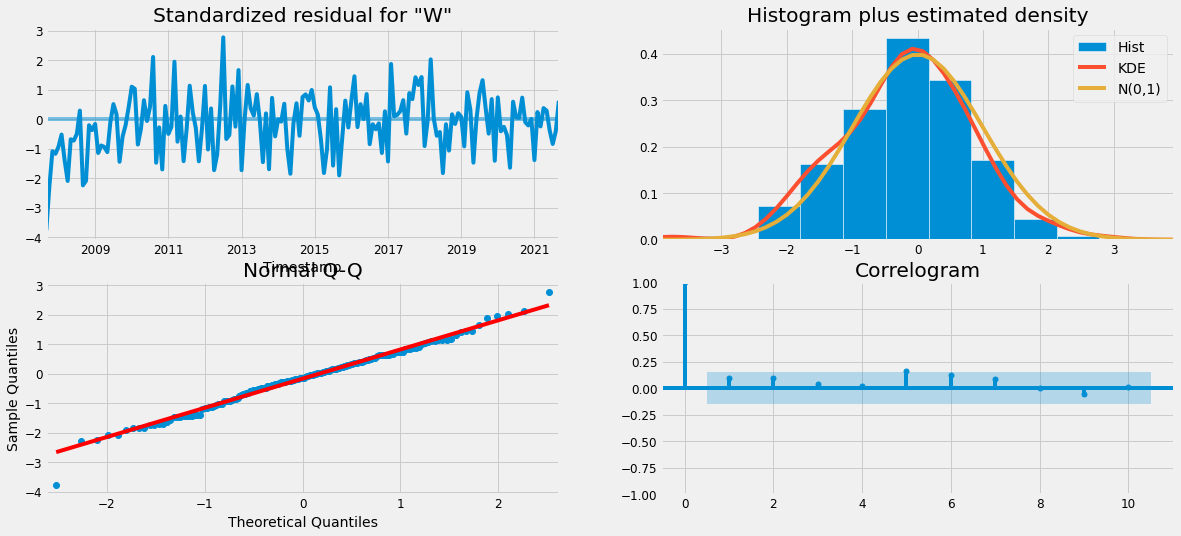

In [21]:
mod.plot_diagnostics(figsize=(18, 8))
plt.show()

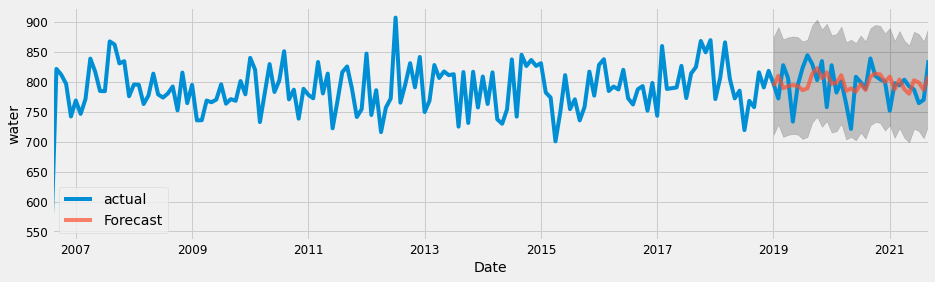

In [22]:
pred = mod.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
# pred = mod.get_prediction(dynamic=False)

pred_ci = pred.conf_int()
ax = df1.plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('water')
plt.legend()
plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = df1['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 923.87
The Root Mean Squared Error is 30.4


In [24]:
#Part IV: Forecasting
#Of course, Python can help us to forecast values even if you don't write the equation.

#If forecast one day ahead
#print(results.forecast(1))

#If forecast two days ahead
prediction = mod.forecast(10)
prediction

2021-10-01    813.590438
2021-11-01    813.300020
2021-12-01    799.428888
2022-01-01    804.531165
2022-02-01    796.469907
2022-03-01    804.495271
2022-04-01    787.336174
2022-05-01    783.091434
2022-06-01    798.644038
2022-07-01    798.502221
Freq: MS, Name: predicted_mean, dtype: float64

In [25]:
import pickle

In [26]:
# Save the model under the cwd
pkl_filename = "sarima.pkl"
file = open(pkl_filename, 'wb')
pickle.dump(mod, file)

In [27]:
# Load the saved model
file = open("sarima.pkl", 'rb')
res = pickle.load(file)

In [28]:
# Now you can use the model
predicted_values = res.forecast(4)
predicted_values

2021-10-01    813.590438
2021-11-01    813.300020
2021-12-01    799.428888
2022-01-01    804.531165
Freq: MS, Name: predicted_mean, dtype: float64